<a href="https://colab.research.google.com/github/AdaobiNwafor/DataScience-Projects/blob/main/Predicting_Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
sales = pd.read_csv('vgsales.csv')
df = pd.DataFrame(sales)
df.head()

Rank                      Name Platform  ...  JP_Sales Other_Sales Global_Sales
0     1                Wii Sports      Wii  ...      3.77        8.46        82.74
1     2         Super Mario Bros.      NES  ...      6.81        0.77        40.24
2     3            Mario Kart Wii      Wii  ...      3.79        3.31        35.82
3     4         Wii Sports Resort      Wii  ...      3.28        2.96        33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...     10.22        1.00        31.37

[5 rows x 11 columns]

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df['Year'].mean()

2006.4064433147546

In [ ]:
df.describe()

Rank          Year  ...   Other_Sales  Global_Sales
count  16598.000000  16327.000000  ...  16598.000000  16598.000000
mean    8300.605254   2006.406443  ...      0.048063      0.537441
std     4791.853933      5.828981  ...      0.188588      1.555028
min        1.000000   1980.000000  ...      0.000000      0.010000
25%     4151.250000   2003.000000  ...      0.000000      0.060000
50%     8300.500000   2007.000000  ...      0.010000      0.170000
75%    12449.750000   2010.000000  ...      0.040000      0.470000
max    16600.000000   2020.000000  ...     10.570000     82.740000

[8 rows x 7 columns]

In [ ]:
df.drop(['Year', 'Publisher'], axis=1, inplace=True)

In [ ]:
df.head()

Rank                      Name Platform  ... JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  ...     3.77         8.46         82.74
1     2         Super Mario Bros.      NES  ...     6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  ...     3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  ...     3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...    10.22         1.00         31.37

[5 rows x 9 columns]

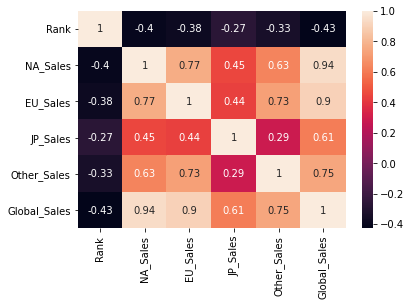

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
x = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
lr = LinearRegression().fit(x_train, y_train)
ypred = lr.predict(x_test)

mse = mean_squared_error(ypred, y_test)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'Linear Regression score: {lr.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')
r2_linear = r2_score(y_test, ypred)

MSE: 0.00
RMSE: 0.01

Linear Regression score: 0.999987961673058
R2 Score: 0.999987961673058


## A plot to show the optimum degree for Polynomial regression

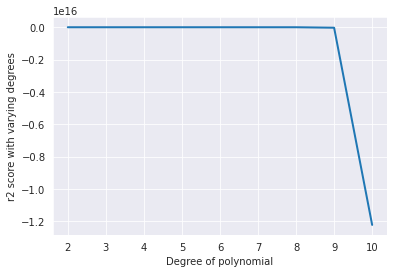

In [ ]:
pr = PolynomialFeatures()

sns.set_style('darkgrid')
scorelist = []
prange = range(2,11)
for i in prange:
  pr = PolynomialFeatures(degree=i)
  xpoly = pr.fit_transform(x_train, y_train)
  poly_lin = LinearRegression().fit(xpoly, y_train)
  ypred = poly_lin.predict(pr.fit_transform(x_test))
  scorelist.append(r2_score(y_test, ypred))

plt.plot(prange, scorelist,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [ ]:
pr = PolynomialFeatures(degree=2)
xpoly = pr.fit_transform(x_train)
pl = LinearRegression()
pl.fit(xpoly, y_train)
ypred = pl.predict(pr.fit_transform(x_test))

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
# print(f'Linear Regression score: {pl.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')
r2_poly = r2_score(y_test, ypred)

MSE: 0.00
RMSE: 0.01

R2 Score: 0.9999879477849605


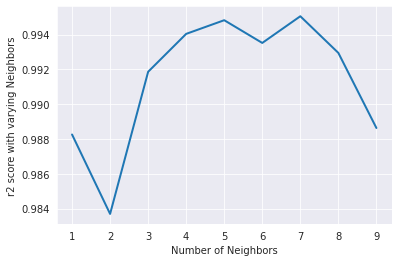

In [ ]:
knn = KNeighborsRegressor()

sns.set_style('darkgrid')
scorelist = []
krange = range(1,10)
for i in krange:
  knn = KNeighborsRegressor(n_neighbors=i).fit(x_train, y_train)
  ypred = knn.predict(x_test)
  scorelist.append(r2_score(y_test, ypred))

plt.plot(krange, scorelist, linewidth=2)
plt.xticks(krange)
plt.xlabel('Number of Neighbors')
plt.ylabel('r2 score with varying Neighbors')
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)
ypred = knn.predict(x_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'KNN Regression score: {knn.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')
r2_knn = r2_score(y_test, ypred)

MSE: 0.00
RMSE: 0.01

KNN Regression score: 0.9950559559770674
R2 Score: 0.9950559559770674


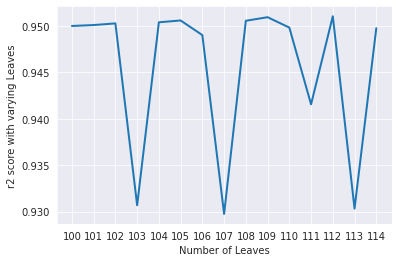

In [ ]:
tree = DecisionTreeRegressor()

sns.set_style('darkgrid')
scorelist = []
trange = range(100,115)
for i in trange:
  tree = DecisionTreeRegressor(max_leaf_nodes=i).fit(x_train, y_train)
  ypred = tree.predict(x_test)
  scorelist.append(r2_score(y_test, ypred))

plt.plot(trange, scorelist, linewidth=2)
plt.xticks(trange)
plt.xlabel('Number of Leaves')
plt.ylabel('r2 score with varying Leaves')
plt.show()

In [ ]:
tree = DecisionTreeRegressor(max_leaf_nodes=110).fit(x_train, y_train)
ypred = tree.predict(x_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'Decision Tree Regression score: {tree.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')
r2_tree = r2_score(y_test, ypred)

MSE: 0.00
RMSE: 0.01

Decision Tree Regression score: 0.9414661905351392
R2 Score: 0.9414661905351392


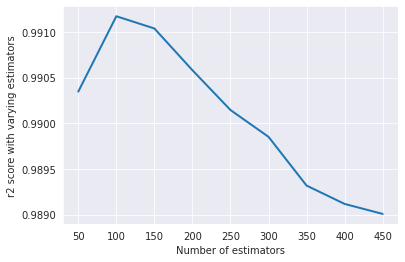

In [ ]:
from sklearn.ensemble import RandomForestRegressor

sns.set_style('darkgrid')
scorelist = []
frange = range(50,500,50)
for i in frange:
  forest = RandomForestRegressor(n_estimators=i, random_state=0).fit(x_train, y_train)
  ypred = forest.predict(x_test)
  scorelist.append(r2_score(y_test, ypred))

plt.plot(frange, scorelist, linewidth=2)
plt.xlabel('Number of estimators')
plt.ylabel('r2 score with varying estimators')
plt.show()

In [ ]:
forest = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)
ypred = forest.predict(x_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'Random Forest Regression score: {forest.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_test,ypred)}')
r2_forest = r2_score(y_test,ypred)

MSE: 0.00
RMSE: 0.01

Random Forest Regression score: 0.9893923442120813
R2 Score: 0.9893923442120813


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

y = df.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


y_train = sc.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc.transform(np.reshape(y_test, (len(y_test),1)))

In [ ]:
svr_lin = SVR(kernel='linear').fit(x_train, y_train)
ypred = svr_lin.predict(x_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'SVM Linear Regression score: {svr_lin.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')
r2_svrlin = r2_score(y_test, ypred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.00
RMSE: 0.01

SVM Linear Regression score: 0.9924930431491618
R2 Score: 0.9924930431491619


In [ ]:
svr_nonlin = SVR(kernel='rbf').fit(x_train, y_train)
ypred = svr_nonlin.predict(x_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'SVM Non linear Regression score: {svr_nonlin.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_pred=ypred, y_true=y_test)}')
r2_svrnonlin = r2_score(y_pred=ypred, y_true=y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.00
RMSE: 0.01

SVM Non linear Regression score: 0.7051516001408905
R2 Score: 0.7051516001408906


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor().fit(x_train, y_train)
ypred = xgb.predict(x_test)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'XGB Regression score: {xgb.score(x_test, y_test)}')
print(f'R2 Score: {r2_score(y_pred=ypred, y_true=y_test)}')
r2_xgb = r2_score(y_pred=ypred, y_true=y_test)

[17:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 0.00
RMSE: 0.01

XGB Regression score: 0.9881387725527615
R2 Score: 0.9881387725527615


In [ ]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_linear,r2_poly,r2_knn,r2_tree,r2_forest,r2_svrlin,r2_svrnonlin,r2_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[99.999, 99.999, 99.506, 94.147, 98.939, 99.249, 70.515, 98.814]


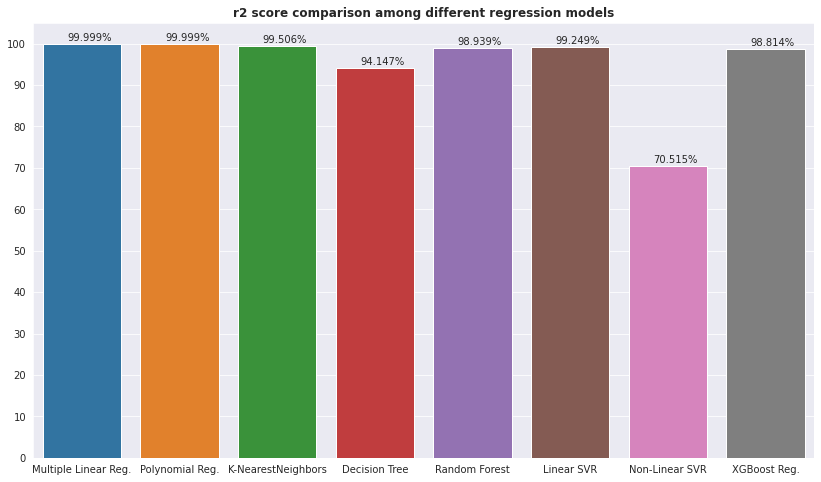

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

In [ ]:
df.head()

Rank                      Name Platform  ... JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  ...     3.77         8.46         82.74
1     2         Super Mario Bros.      NES  ...     6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  ...     3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  ...     3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...    10.22         1.00         31.37

[5 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

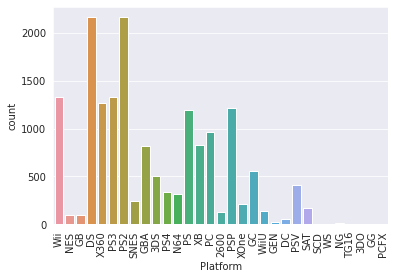

In [ ]:
sns.countplot('Platform', data=df)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

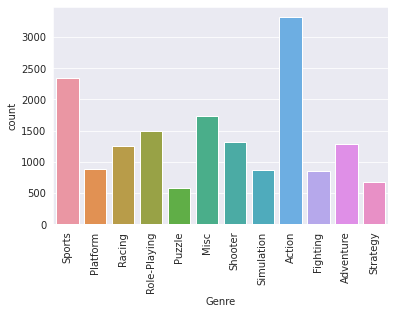

In [ ]:
sns.countplot('Genre', data=df)
plt.xticks(rotation=90)

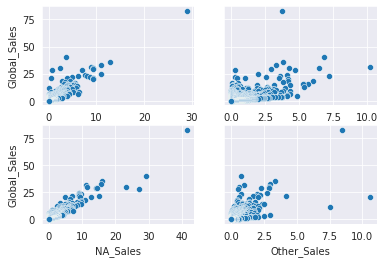

In [ ]:
fig, axes = plt.subplots(2,2, sharey=True)

sns.scatterplot(ax=axes[0,0], x=df['EU_Sales'], y=df['Global_Sales'], data=df)
sns.scatterplot(ax=axes[0,1], x=df['JP_Sales'], y=df['Global_Sales'], data=df)
sns.scatterplot(ax=axes[1,0], x=df['NA_Sales'], y=df['Global_Sales'], data=df)
sns.scatterplot(ax=axes[1,1], x=df['Other_Sales'], y=df['Global_Sales'], data=df)

In [ ]:
genre_group = df.groupby('Genre')
glob_sales_per_genre = genre_group['Global_Sales'].sum().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

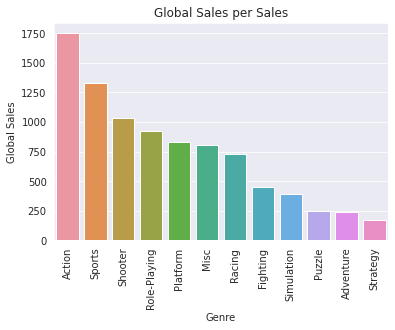

In [ ]:
sns.barplot(data=glob_sales_per_genre, x='Genre', y='Global_Sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global Sales per Sales')
plt.xticks(rotation=90)

Text(0, 0.5, 'Global Sales')

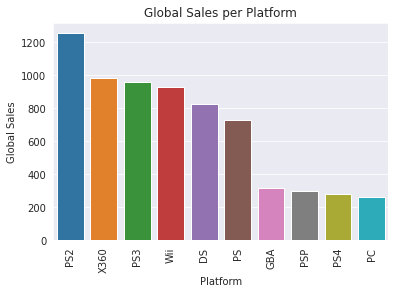

In [ ]:
platform_group = df.groupby('Platform')
glob_sales_per_plat = platform_group['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=glob_sales_per_plat, x='Platform', y='Global_Sales')
plt.xticks(rotation=90)
plt.title('Global Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')

Text(0, 0.5, 'Global Sales')

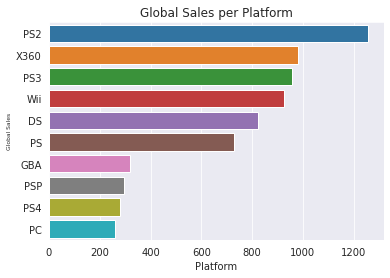

In [ ]:
sns.barplot(data=glob_sales_per_plat, x='Global_Sales', y='Platform')
# plt.xticks(rotation=90)
plt.title('Global Sales per Platform')
plt.xlabel('Platform', fontsize=10)
plt.ylabel('Global Sales', fontsize=6)

In [ ]:
!pip install dataprep
from dataprep.eda import create_report



     |████████████████████████████████| 1.8MB 4.0MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 849kB 18.7MB/s 
     |████████████████████████████████| 727kB 29.1MB/s 
     |████████████████████████████████| 1.5MB 24.7MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 368kB 44.2MB/s 
     |████████████████████████████████| 1.3MB 35.7MB/s 
     |████████████████████████████████| 10.1MB 38.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 747kB 38.6MB/s 
     |████████████████████████████████| 122kB 44.4MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 143kB 40.8MB/s 
     |████████████████████████████████| 296kB 38.0MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-cp37-none-any.whl size=13918 sha256=b942f36250a4cba85aec4fdedeef4886805082188954438a13c166cf0eded452
  Stored in d

DataPrep Report
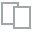
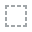
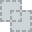
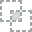
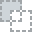
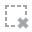
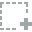
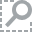
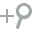
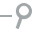
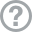
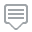
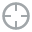
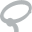
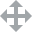
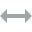
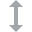
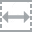
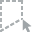
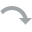
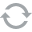
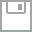
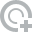
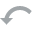
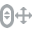
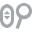
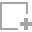
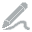
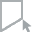
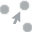
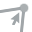
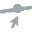

In [ ]:
create_report(df)